In [1]:
#%reset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from num2words import num2words
from word2number import w2n
from matplotlib.patches import Polygon

hfont = {'fontname':'Helvetica'}



# By state

In [3]:
data_by_HSA = pd.read_csv('/Users/rem76/Documents/COVID_projections/hsa_time_data_all_dates.csv')
data_by_HSA['health_service_area_number']
data_by_HSA['health_service_area']
data_by_HSA = data_by_HSA.dropna(subset=['admits_weekly', 'deaths_weekly', 'cases_weekly', 'icu_weekly', 'beds_weekly',  'perc_covid'])
data_by_HSA['HSA_ID'] = data_by_HSA['health_service_area_number'].astype(str) + '' + data_by_HSA['health_service_area'].apply(lambda x: x.split()[0])
data_by_HSA['beds_over_15_100k'] = (data_by_HSA['beds_weekly'] > 15)*1

/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_31053/3370801396.py:1: DtypeWarning: Columns (41,43,44,45,46,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  data_by_HSA = pd.read_csv('/Users/rem76/Documents/COVID_projections/hsa_time_data_all_dates.csv')


In [4]:
# need to redo dates 

for i, week in enumerate(data_by_HSA['date'].unique()):
    data_by_HSA.loc[data_by_HSA['date'] == week, 'week'] = i

In [131]:
missing_data_train_HSA =[2.2388059701492535, 1.9900497512437811, 2.2388059701492535, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.7412935323383085, 1.4925373134328357, 1.4925373134328357, 1.7412935323383085, 1.7412935323383085, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357]
missing_data_test_HSA =[0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 1.2437810945273633, 1.2437810945273633, 1.2437810945273633, 1.2437810945273633, 1.2437810945273633, 1.4925373134328357, 1.4925373134328357]

/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_1614/2215657776.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(labels =np.array(range(0, 123, 10)), rotation = 0, fontsize=10)


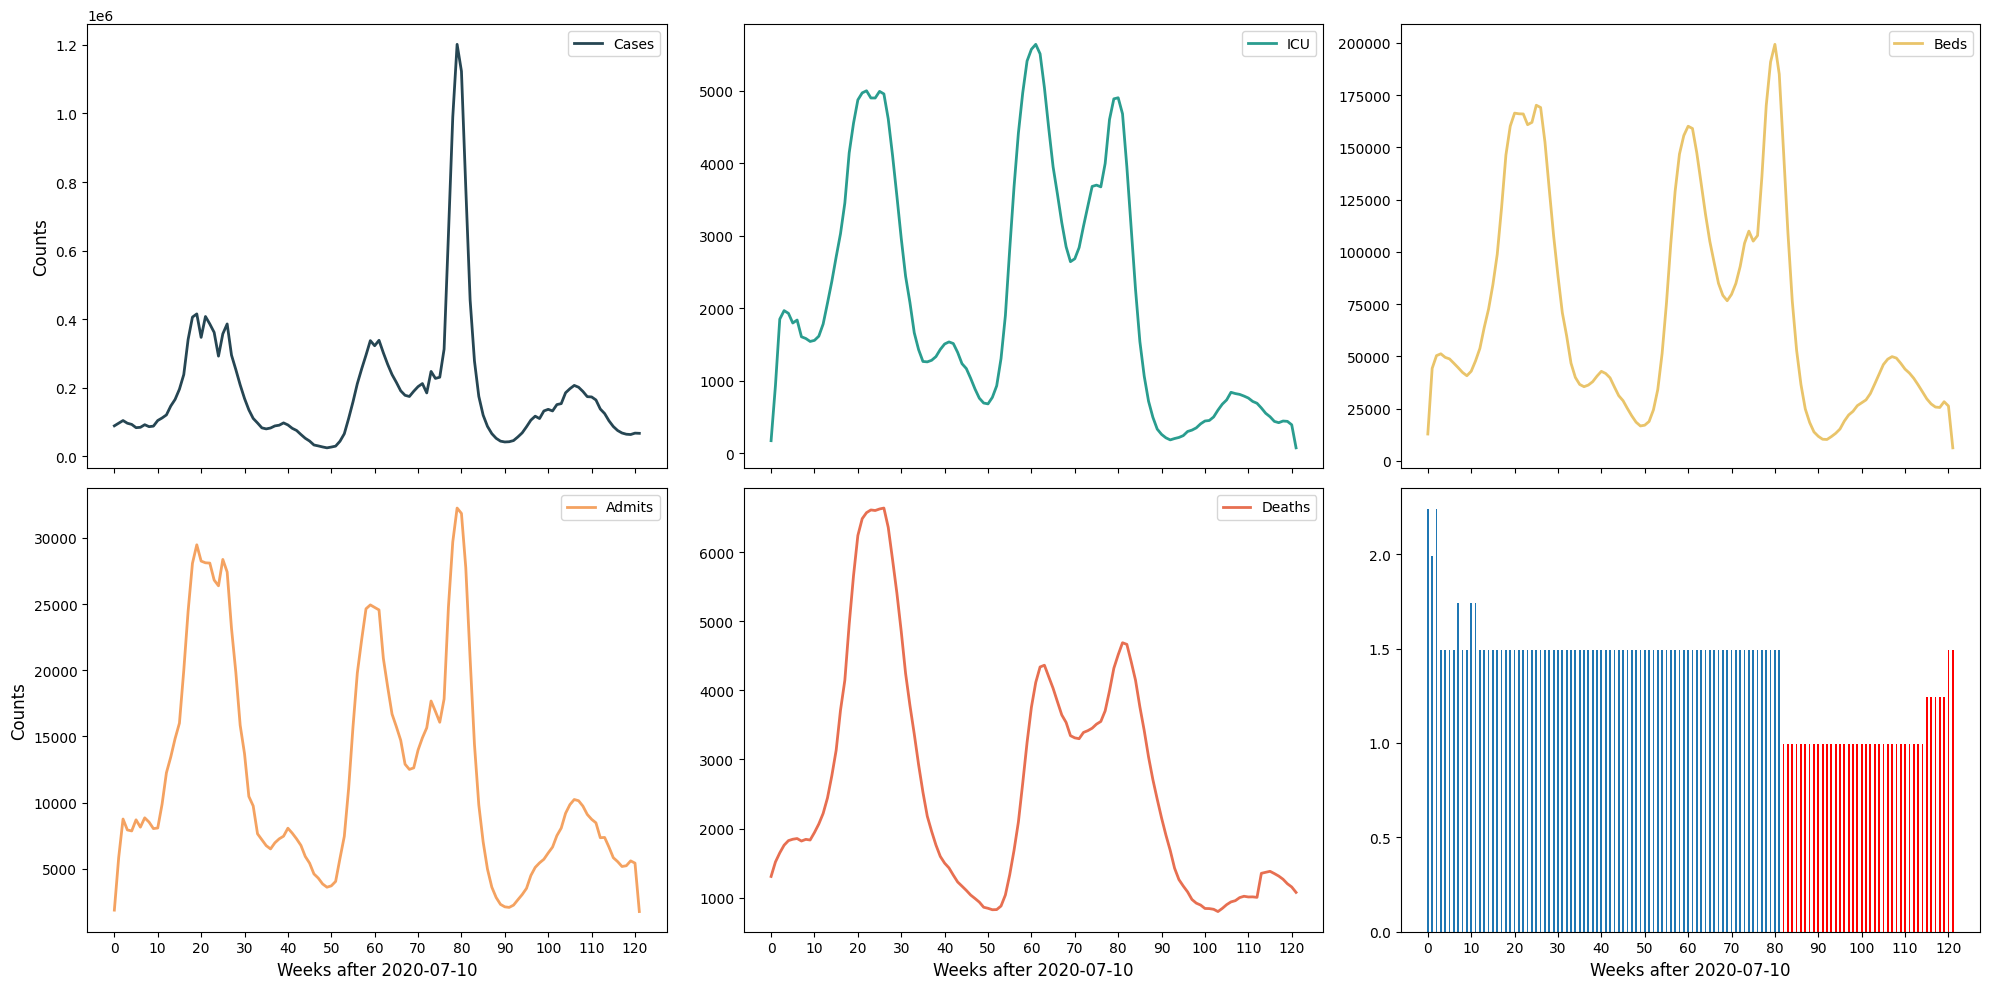

In [98]:
fig, axs = plt.subplots(2,3, figsize=(20, 10), facecolor='w', edgecolor='k', sharex='all')
axs = axs.ravel()

axs[0].set_ylabel("Counts", fontsize = 12)
axs[3].set_ylabel("Counts", fontsize = 12)
axs[1].set_ylabel("", fontsize = 12)
axs[2].set_ylabel("", fontsize = 12)
axs[4].set_ylabel("", fontsize = 12)
axs[5].set_ylabel("", fontsize = 12)
axs[3].set_xlabel("Weeks after 2020-07-10", fontsize = 12)
axs[4].set_xlabel("Weeks after 2020-07-10", fontsize = 12)
axs[5].set_xlabel("Weeks after 2020-07-10", fontsize = 12)

columns_to_plot = ['cases_weekly', 'icu_weekly', 'beds_weekly', 'admits_weekly', 'deaths_weekly', 'beds_over_15_100k']
labels = ['Cases', 'ICU', 'Beds', 'Admits', 'Deaths', 'Over_100k']
colours =['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', 'red']
weekly_groups = data_by_HSA.groupby('week')
i = 0
width = 0.4
x = np.arange(len(missing_data_train_HSA) + len(missing_data_test_HSA))

#x_ticks_labels = np.concatenate((np.arange(len(missing_data_train_HSA), step=10), np.arange(len(missing_data_test_HSA), step=10)), axis=0)

for column in columns_to_plot:
        if column == 'beds_over_15_100k':
                axs[i].bar(x[:len(missing_data_train_HSA)], missing_data_train_HSA, width, label='Train')
                axs[i].bar(x[len(missing_data_train_HSA):], missing_data_test_HSA, width, label='Test', color='red')
                axs[i].set_xticklabels(labels =np.array(range(0, 123, 10)), rotation = 0, fontsize=10)
                axs[i].set_xticks(ticks =  np.array(range(0, 123, 10)), labels = np.array(range(0, 123, 10)), rotation = 0, fontsize=10)
                # Labels and title

        else:
                axs[i].plot(weekly_groups['week'].first(), weekly_groups[column].sum(), label = labels[i], color = colours[i], linewidth = 2)
                axs[i].legend()

                axs[i].set_xticklabels(labels =np.array(range(0, 123, 10)), rotation = 0, fontsize=10)
                axs[i].set_xticks(ticks =  np.array(range(0, 123, 10)), labels = np.array(range(0, 123, 10)), rotation = 0, fontsize=10)

                        

        i += 1

#plt.show()
fig.tight_layout()

plt.savefig('Graphs/Time_trends_July_2020_November_2022.png', dpi = 300)

In [37]:
np.arange(len(missing_data_train_HSA)//10, step=10)
np.arange(len(missing_data_train_HSA), step=10)

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80])

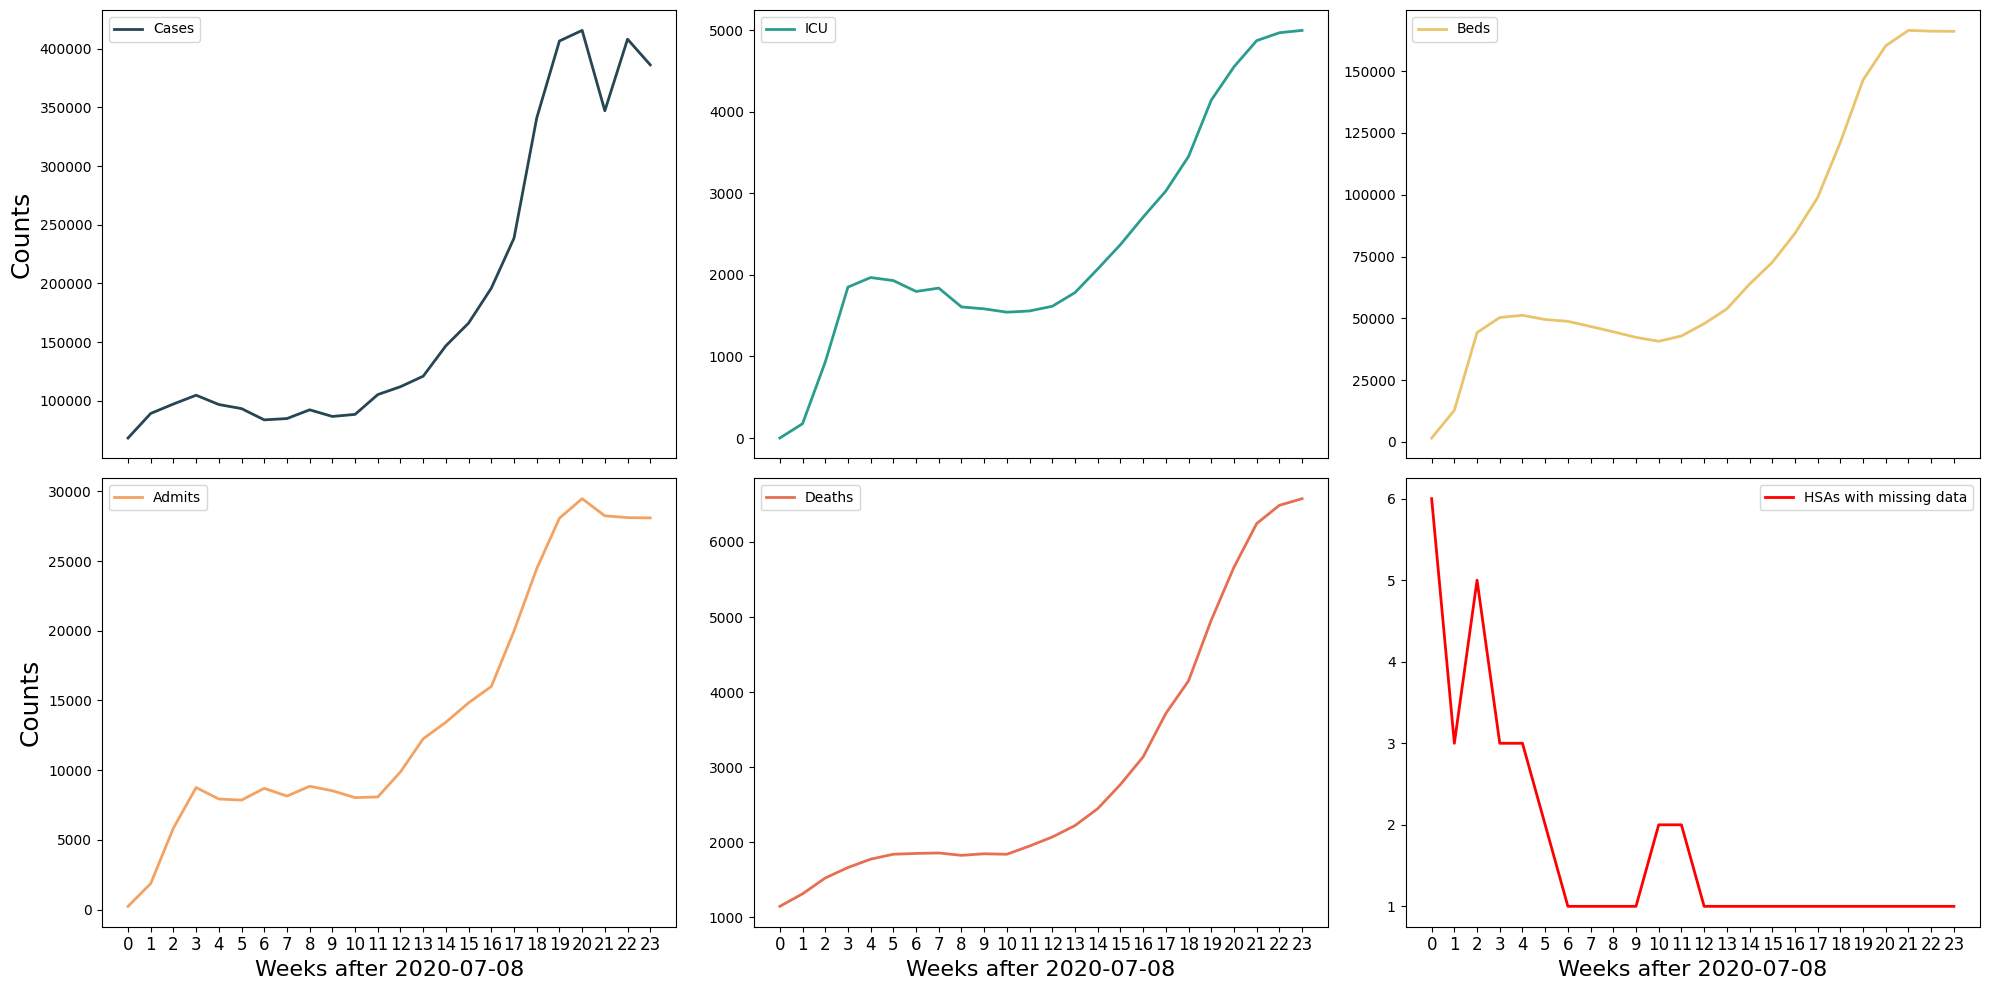

In [20]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10), facecolor='w', edgecolor='k', sharex='all')
axs = axs.ravel()

axs[0].tick_params(axis='both', which='both', labelsize=10)
axs[1].tick_params(axis='both', which='both', labelsize=10)
axs[2].tick_params(axis='both', which='both', labelsize=10)
axs[3].tick_params(axis='both', which='both', labelsize=10)
axs[4].tick_params(axis='both', which='both', labelsize=10)
axs[5].tick_params(axis='both', which='both', labelsize=10)

columns_to_plot = ['cases_weekly', 'icu_weekly', 'beds_weekly', 'admits_weekly', 'deaths_weekly', 'beds_over_15_100k']
labels = ['Cases', 'ICU', 'Beds', 'Admits', 'Deaths', 'Over_100k']
colours =['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', 'red']
weekly_groups = data_by_HSA.groupby('date')
i = 0

axs[0].set_ylabel("Counts", fontsize = 18)
axs[3].set_ylabel("Counts", fontsize = 18)
axs[3].set_xlabel("Weeks after 2020-07-08", fontsize = 16)
axs[4].set_xlabel("Weeks after 2020-07-08", fontsize = 16)
axs[5].set_xlabel("Weeks after 2020-07-08", fontsize = 16)
for column in columns_to_plot:
    if column == 'beds_over_15_100k':
        missing_data_counts = weekly_groups.apply(lambda x: x['beds_weekly'].isnull().sum())
        axs[i].plot(weekly_groups['date'].first(), missing_data_counts,
                    label='HSAs with missing data', color=colours[i], linewidth=2)
    else:
        axs[i].plot(weekly_groups['date'].first(), weekly_groups[column].sum(),
                    label=labels[i], color=colours[i], linewidth=2)

    axs[i].legend()

    axs[i].set_xticks(range(len(data_by_HSA['date'].unique())))
    axs[i].set_xticklabels(labels=range(len(data_by_HSA['date'].unique())), rotation=0, fontsize=12)

    i += 1
plt.tight_layout()

plt.savefig('Graphs/Time_trends_July_December.png', dpi = 300)

# Plot based on counties 

In [2]:

data_by_county = pd.read_csv('/Users/rem76/Documents/COVID_projections/county_time_data_all_dates.csv')

data_by_county = data_by_county.dropna(subset=['admits_weekly', 'deaths_weekly', 'cases_weekly', 'icu_weekly', 'beds_weekly', 'perc_covid'])
data_by_county['CTYNAME'] = data_by_county['CTYNAME'].apply(lambda x: x.split()[0])
data_by_county['CTYNAME'] = data_by_county['fips'].astype(str) + '' + data_by_county['CTYNAME']
data_by_county['beds_over_15_100k'] = (data_by_county['beds_weekly'] > 15) * 1

# Redo dates
for i, week in enumerate(data_by_county['date'].unique()):
    data_by_county.loc[data_by_county['date'] == week, 'week'] = i

/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_21039/2686393552.py:1: DtypeWarning: Columns (47,48,49,50,51,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  data_by_county = pd.read_csv('/Users/rem76/Documents/COVID_projections/county_time_data_all_dates.csv')


In [3]:
subplot_labels = ["A", "B", "C", "D", "E", "F" ]

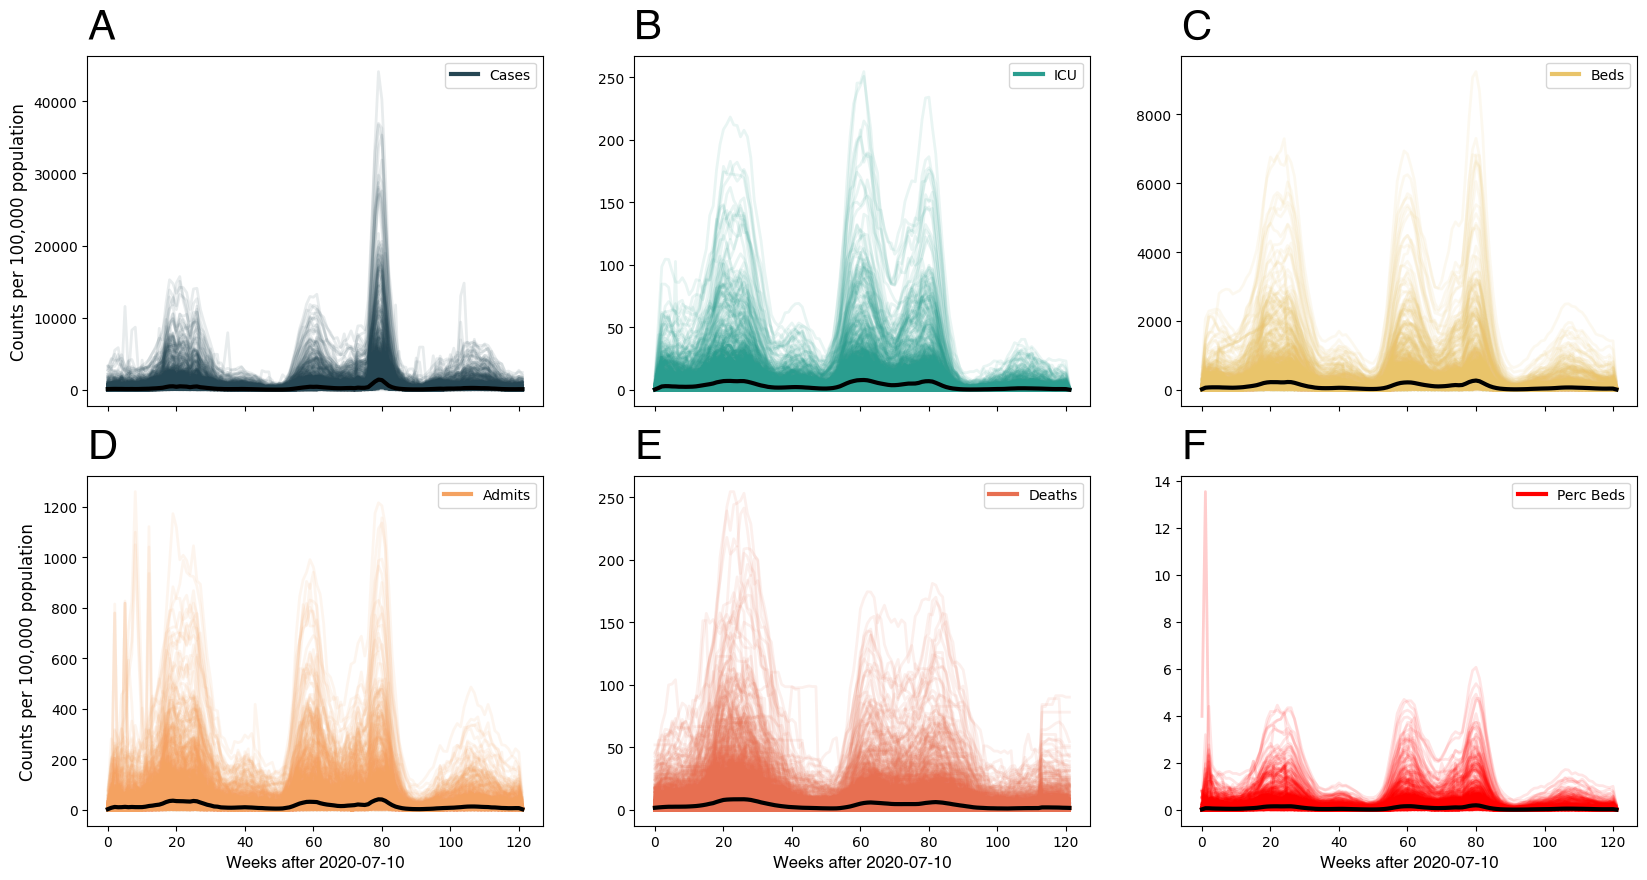

In [4]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10), facecolor='w', edgecolor='k', sharex='all')
axs = axs.ravel()

axs[0].set_ylabel("Counts per 100,000 population", fontsize=12)
axs[3].set_ylabel("Counts per 100,000 population", fontsize=12)
axs[1].set_ylabel("", fontsize=12)
axs[2].set_ylabel("", fontsize=12)
axs[4].set_ylabel("", fontsize=12)
axs[5].set_ylabel("", fontsize=12)
axs[3].set_xlabel("Weeks after 2020-07-10", fontsize=12, **hfont)
axs[4].set_xlabel("Weeks after 2020-07-10", fontsize=12, **hfont)
axs[5].set_xlabel("Weeks after 2020-07-10", fontsize=12, **hfont)
weekly_county_groups = data_by_county.groupby(['week'])  # Group by county and week

columns_to_plot = ['cases_weekly', 'icu_weekly', 'beds_weekly', 'admits_weekly', 'deaths_weekly', 'perc_covid']
labels = ['Cases', 'ICU', 'Beds', 'Admits', 'Deaths', 'Perc Beds']
colours =['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', 'red']
weekly_county_groups = data_by_county.groupby(['week'])  # Group by county and week
i = 0
width = 0.4
high_icu = []
high_cases = []
high_beds = []
high_admits = []
high_deaths = []
percentiles_dict = {}
average_data_dict = {}
x = np.arange(len(weekly_county_groups))
for column in columns_to_plot:
    #if column == 'beds_over_15_100k':
       # axs[i].bar(x[:len(missing_data_train_county)], missing_data_train_county, width, label='Train')
       # axs[i].bar(x[len(missing_data_train_county):], missing_data_test_county, width, label='Test', color='red')
       # axs[i].set_xticklabels(labels=np.arange(0, len(x), 10), rotation=0, fontsize=10)
       # axs[i].set_xticks(np.arange(0, len(x), 10))
    #else:

        for county in data_by_county['county'].unique():
            county_data = data_by_county[data_by_county['county'] == county]
            county_data_weekly = county_data.groupby(['week'])
            axs[i].plot(county_data_weekly['week'].first(), county_data_weekly[column].sum(), color=colours[i], linewidth=2, alpha=0.1)
            sum_value = county_data_weekly[column].sum()
            if column == 'cases_weekly':
                if sum_value.gt(10000).any():
                    high_cases.append(county)

            elif column == 'icu_weekly':
                if sum_value.gt(50).any():
                    high_icu.append(county) 

            elif column == 'beds_weekly':
                if sum_value.gt(2000).any():
                    high_beds.append(county)   

            elif column == 'admits_weekly':
                if sum_value.gt(200).any():
                    high_admits.append(county)   
     
            elif column == 'deaths_weekly':
                if sum_value.gt(150).any():
                    high_deaths.append(county)  
       
        # Calculate and plot the average
        average_data = data_by_county.groupby('week')[column].mean()
        average_data_dict[column] = average_data
        axs[i].plot(average_data.index, average_data,  color=colours[i],  label=labels[i], linewidth=3)
        axs[i].plot(average_data.index, average_data, color='black', linewidth=3)
        axs[i].text(axs[i].get_xlim()[0] , axs[i].get_ylim()[1]* 1.05, subplot_labels[i], fontsize = 30, **hfont)

        axs[i].legend()

        i += 1

plt.savefig('Graphs/Time_trends_July_December_by_county.png', dpi = 300)

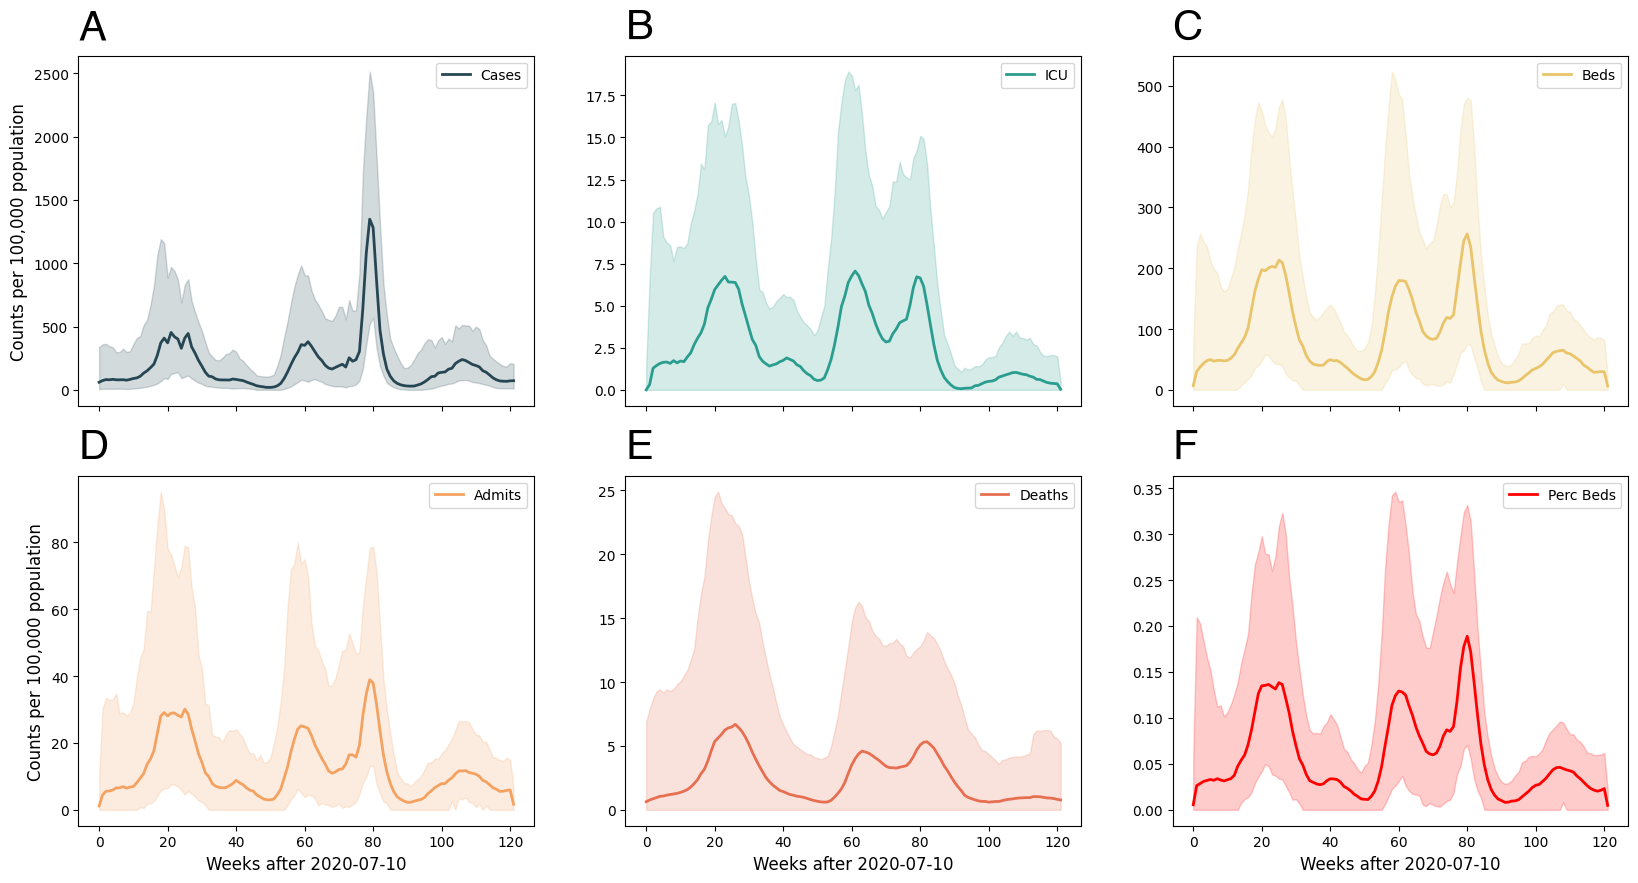

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10), facecolor='w', edgecolor='k', sharex='all')
axs = axs.ravel()

axs[0].set_ylabel("Counts per 100,000 population", fontsize=12)
axs[3].set_ylabel("Counts per 100,000 population", fontsize=12)
axs[1].set_ylabel("", fontsize=12)
axs[2].set_ylabel("", fontsize=12)
axs[4].set_ylabel("", fontsize=12)
axs[5].set_ylabel("", fontsize=12)
axs[3].set_xlabel("Weeks after 2020-07-10", fontsize=12)
axs[4].set_xlabel("Weeks after 2020-07-10", fontsize=12)
axs[5].set_xlabel("Weeks after 2020-07-10", fontsize=12)
weekly_county_groups = data_by_county.groupby(['week'])  # Group by county and week

columns_to_plot = ['cases_weekly', 'icu_weekly', 'beds_weekly', 'admits_weekly', 'deaths_weekly', 'perc_covid']
labels = ['Cases', 'ICU', 'Beds', 'Admits', 'Deaths', 'Perc Beds']
colours =['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', 'red']
weekly_county_groups = data_by_county.groupby(['week'])  # Group by county and week
i = 0
width = 0.4

percentiles_dict = {}
average_data_dict = {}
x = np.arange(len(weekly_county_groups))
percentiles_dict = {}
average_data_dict = {}
for column in columns_to_plot:
        # Calculate percentiles for each week
    percentiles = data_by_county.groupby('week')[column].quantile([0.05, 0.5, 0.95])
    percentiles_dict[column] = percentiles.unstack(level=-1).values.tolist()

        # Plot median and IQR
    axs[i].plot(range(len(percentiles.loc[:, 0.5])), percentiles.loc[:, 0.5], color=colours[i],label=labels[i],linewidth=2)
    axs[i].fill_between(range(len(percentiles.loc[:, 0.5])), percentiles.loc[:, 0.05], percentiles.loc[:, 0.95], alpha=0.2, color=colours[i])
    axs[i].text(axs[i].get_xlim()[0] , axs[i].get_ylim()[1]* 1.05, subplot_labels[i], fontsize = 30, **hfont)

    axs[i].legend()

    i += 1


plt.savefig('Graphs/Time_trends_July_December_by_county_95_range.png', dpi = 300)



In [6]:
high_deaths
print(len(high_icu))
print(len(high_admits))
print(len(high_beds))
print(len(high_cases))

94
214
69
61


In [7]:
data_by_county = pd.read_csv('/Users/rem76/Documents/COVID_projections/county_time_data_all_dates.csv')

data_by_county['CTYNAME_first'] = data_by_county['CTYNAME'].apply(lambda x: x.split()[0])

/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_21039/4114543107.py:1: DtypeWarning: Columns (47,48,49,50,51,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  data_by_county = pd.read_csv('/Users/rem76/Documents/COVID_projections/county_time_data_all_dates.csv')


In [8]:
high_admits

['Butler',
 'Calhoun',
 'Cherokee',
 'Choctaw',
 'Clarke',
 'Clay',
 'Coffee',
 'Dallas',
 'DeKalb',
 'Fayette',
 'Franklin',
 'Greene',
 'Henry',
 'Houston',
 'Jackson',
 'Jefferson',
 'Lamar',
 'Lauderdale',
 'Lawrence',
 'Lee',
 'Macon',
 'Madison',
 'Marion',
 'Marshall',
 'Monroe',
 'Montgomery',
 'Morgan',
 'Perry',
 'Pike',
 'Randolph',
 'St. Clair',
 'Shelby',
 'Sumter',
 'Washington',
 'Mohave',
 'Arkansas',
 'Ashley',
 'Benton',
 'Boone',
 'Carroll',
 'Chicot',
 'Clark',
 'Columbia',
 'Crawford',
 'Crittenden',
 'Fulton',
 'Grant',
 'Howard',
 'Johnson',
 'Lafayette',
 'Lincoln',
 'Logan',
 'Miller',
 'Phillips',
 'Polk',
 'Pope',
 'Prairie',
 'Pulaski',
 'Saline',
 'Scott',
 'Union',
 'White',
 'Lake',
 'Orange',
 'Adams',
 'Cheyenne',
 'Custer',
 'Delta',
 'Douglas',
 'Garfield',
 'Middlesex',
 'Kent',
 'Sussex',
 'Hamilton',
 'Martin',
 'Putnam',
 'Seminole',
 'Taylor',
 'Ben Hill',
 'Camden',
 'Dawson',
 'Decatur',
 'Floyd',
 'Grady',
 'Hall',
 'Hancock',
 'Hart',
 'Irwin

In [75]:
from collections import Counter
subset_states = data_by_county.loc[data_by_county['CTYNAME_first'].isin(high_icu), ['STNAME', 'CTYNAME_first']]
subset_states.drop_duplicates(subset='CTYNAME_first', inplace=True)
Counter(subset_states['STNAME'])

Counter({'Alabama': 30,
         'Arkansas': 19,
         'California': 2,
         'Colorado': 2,
         'Florida': 4,
         'Georgia': 9,
         'Idaho': 1,
         'Illinois': 10,
         'Indiana': 4,
         'Kansas': 4,
         'Kentucky': 3,
         'Louisiana': 1,
         'North Carolina': 1,
         'Ohio': 1,
         'Pennsylvania': 1,
         'Texas': 1})

In [9]:
subset_states = data_by_county.loc[data_by_county['CTYNAME_first'].isin(high_deaths), ['STNAME', 'CTYNAME_first']]
subset_states.drop_duplicates(subset='CTYNAME_first', inplace=True)
Counter(subset_states['STNAME'])

NameError: name 'Counter' is not defined

In [ ]:
subset_states = data_by_county.loc[data_by_county['CTYNAME_first'].isin(high_admits), ['STNAME', 'CTYNAME_first']]
subset_states.drop_duplicates(subset='CTYNAME_first', inplace=True)
Counter(subset_states['STNAME'])

Counter({'Alabama': 33,
         'Arizona': 1,
         'Arkansas': 27,
         'California': 2,
         'Colorado': 6,
         'Connecticut': 1,
         'Delaware': 2,
         'Florida': 5,
         'Georgia': 24,
         'Idaho': 4,
         'Illinois': 14,
         'Indiana': 6,
         'Iowa': 3,
         'Kansas': 27,
         'Kentucky': 18,
         'Louisiana': 2,
         'Missouri': 1,
         'Montana': 6,
         'Nebraska': 6,
         'New York': 1,
         'Ohio': 1,
         'Oklahoma': 5,
         'Texas': 10,
         'Wisconsin': 2})

In [ ]:
subset_states = data_by_county.loc[data_by_county['CTYNAME_first'].isin(high_beds), ['STNAME', 'CTYNAME_first']]
subset_states.drop_duplicates(subset='CTYNAME_first', inplace=True)
Counter(subset_states['STNAME'])

Counter({'Alabama': 23,
         'Arkansas': 19,
         'California': 2,
         'Colorado': 2,
         'Florida': 4,
         'Georgia': 5,
         'Illinois': 7,
         'Indiana': 1,
         'Kansas': 2,
         'Kentucky': 1,
         'Louisiana': 1})

In [ ]:
subset_states = data_by_county.loc[data_by_county['CTYNAME_first'].isin(high_cases), ['STNAME', 'CTYNAME_first']]
subset_states.drop_duplicates(subset='CTYNAME_first', inplace=True)
Counter(subset_states['STNAME'])

Counter({'Alabama': 23,
         'Arkansas': 16,
         'California': 2,
         'Colorado': 2,
         'Florida': 2,
         'Georgia': 4,
         'Idaho': 1,
         'Illinois': 7,
         'Indiana': 2,
         'Oklahoma': 1,
         'Texas': 1})

# Missing data by county 

In [42]:
data_by_HSA = pd.read_csv('/Users/rem76/Documents/COVID_projections/hsa_time_data_all_dates.csv')
data_by_HSA['health_service_area_number']
data_by_HSA['health_service_area']
#data_by_HSA['HSA_ID'] = data_by_HSA['health_service_area_number'].astype(str) + '' + data_by_HSA['health_service_area'].apply(lambda x: x.split()[0])
data_by_HSA.rename(columns={'health_service_area_number': 'HSA_ID'}, inplace=True)

data_by_HSA['beds_over_15_100k'] = (data_by_HSA['beds_weekly'] > 15)*1

# remove HSAs that have missing data in specific columns

data_by_HSA = data_by_HSA.dropna(subset=['admits_weekly', 'deaths_weekly', 'cases_weekly', 'icu_weekly', 'beds_weekly', 'perc_covid'])

/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_31053/3165355871.py:1: DtypeWarning: Columns (41,43,44,45,46,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  data_by_HSA = pd.read_csv('/Users/rem76/Documents/COVID_projections/hsa_time_data_all_dates.csv')


In [43]:
def merge_and_rename_data(data1, data2, on_column, suffix1, suffix2):
    merged_data = pd.merge(data1, data2, on=on_column, suffixes=('_'+suffix1, '_'+suffix2))

    new_column_names = [col.replace(f'_{on_column}_{suffix1}', f'_{suffix1}').replace(f'_{on_column}_{suffix2}', f'_{suffix2}') for col in merged_data.columns]
    merged_data.rename(columns=dict(zip(merged_data.columns, new_column_names)), inplace=True)

    return merged_data

def pivot_data_by_HSA(data, index_column, columns_column, values_column):
    data_by_HSA = data[[index_column, columns_column, values_column]]
    pivot_table = data_by_HSA.pivot_table(index=index_column, columns=columns_column, values=values_column)
    return pivot_table

def create_column_names(categories_for_subsetting, num_of_weeks):
    column_names = ['HSA_ID']

    for week in range(1, num_of_weeks + 1):
        week = num2words(week)
        for category in categories_for_subsetting:
            column_name = f'week_{week}_{category}'
            column_names.append(column_name)

    return column_names
    
def create_collated_weekly_data(pivoted_table, original_data, categories_for_subsetting, geography, column_names):
    collated_data = pd.DataFrame(index=range(51), columns=column_names)

    x = 0
    for geo in original_data[geography].unique():
        #matching_indices = [i for i, geo_col in enumerate(pivoted_table) if geo_col == geo]
        collated_data.loc[x, geography] = geo
        columns_to_subset = [f'{geo}_{category}' for category in categories_for_subsetting]
        j = 1
        try:
            for row in range(len(pivoted_table.loc[:, columns_to_subset])):
                collated_data.iloc[x, j:j + len(categories_for_subsetting)] = pivoted_table.loc[row, columns_to_subset]
                j += len(categories_for_subsetting)
        except:
            pass
        x += 1

    return collated_data


def add_changes_by_week(weekly_data_frame, outcome_column):

    for column in weekly_data_frame.columns[1:]:
        # Calculate the difference between each row and the previous row
        if outcome_column not in column.lower(): #want to leave out the outcome column
            diff = weekly_data_frame[column].diff()
            
            # Create a new column with the original column name and "delta"
            new_column_name = column + "_delta"
            
            column_index = weekly_data_frame.columns.get_loc(column)
            
            # Insert the new column just after the original column
            weekly_data_frame.insert(column_index + 1, new_column_name, diff)
            weekly_data_frame[new_column_name] = diff
    return weekly_data_frame


def prep_training_test_data_period(data, no_weeks, weeks_in_futre, if_train, geography, weight_col):
## Get the weeks for the x and y datasets   
    x_weeks = []  
    y_weeks = []
    y_weeks_to_check = [] #check these weeks to see if any of them are equal to 1
    for week in no_weeks:
        test_week = int(week) + weeks_in_futre
        x_weeks.append('_' + num2words(week) + '_')
        for week_y in range(week+1, test_week+1):
                y_weeks_to_check.append('_' + num2words(week_y) + '_')
        y_weeks.append('_' + num2words(test_week) + '_')
    
## Divide up the test/train split
    #if is_geographic:
        # Calculate the index to start slicing from
    #    start_index = len(data['county']) // proportion[0] * proportion[1]
        # Divide up the dataset based on this proportion
    #    first_two_thirds = data['county'][:start_index]
    #    last_third = data['county'][start_index:]
    X_data = pd.DataFrame()
    y_data = pd.DataFrame()
    weights_all =  pd.DataFrame()
    missing_data = []
    ## Now get the training data 
    k = 0
    for x_week in x_weeks:
            y_week = y_weeks[k]
            k +=1

            weeks_x = [col for col in data.columns if x_week in col]
            columns_x  = [geography] + weeks_x + [weight_col]
            data_x = data[columns_x]

            weeks_y = [col for col in data.columns if y_week in col]
            columns_y  = [geography] + weeks_y
            data_y = data[columns_y]
            ### now add the final column to the y data that has it so that it's if any week in the trhee week perdiod exceeded 15
            train_week = w2n.word_to_num(x_week.replace("_", ""))
            target_week =  w2n.word_to_num(y_week.replace("_", ""))
            y_weeks_to_check = []
            for week_to_check in range(train_week + 1, target_week + 1):
                y_weeks_to_check.append('_' + num2words(week_to_check) + '_')

            y_weeks_to_check = [week + 'beds_over_15_100k' for week in y_weeks_to_check]
            columns_to_check = [col for col in data.columns if any(week in col for week in y_weeks_to_check)]
            y_over_in_period = data[columns_to_check].apply(max, axis=1)
            data_y = pd.concat([data_y, y_over_in_period], axis=1)
            # ensure they have the same amount of data
            #remove rows in test_data1 with NA in test_data2
            data_x = data_x.dropna()
            data_x = data_x[data_x[geography].isin(data_y[geography])]
            # remove rows in test_data2 with NA in test_data1
            data_y = data_y.dropna()
            data_y = data_y[data_y[geography].isin(data_x[geography])]
            data_x = data_x[data_x[geography].isin(data_y[geography])]
            data_x_no_HSA = len(data_x[geography].unique())

            missing_data.append(((len(data[geography].unique()) - data_x_no_HSA)/len(data[geography].unique())) * 100)
            # get weights 
            #weights = weight_data[weight_data[geography].isin(data_x[geography])][[geography, weight_col]]

            X_week = data_x.iloc[:, 1:len(columns_x)]  # take away y, leave weights for mo
            y_week = data_y.iloc[:, -1] 
            
            y_week = y_week.astype(int)
            if if_train:

                 X_week, y_week = oversample.fit_resample(X_week, y_week)
            weights = X_week.iloc[:, -1] 
            X_week = X_week.iloc[:, :len(X_week.columns)-1] # remove the weights and leave "target" for that week, inlcuding it as a feature

            #rename columns for concatenation 
            X_week.columns = range(1, len(data_x.columns) -1)
            y_week.columns = range(1, len(data_y.columns) -1)
            X_data = pd.concat([X_data, X_week])
            y_data = pd.concat([y_data, y_week]) 
        
            weights_all =  pd.concat([weights_all, weights]) 


    X_data.reset_index(drop=True, inplace=True)
    y_data.reset_index(drop=True, inplace=True)
    weights_all.reset_index(drop=True, inplace=True)

    return(X_data, y_data, weights_all, missing_data)

def calculate_ppv_npv(true_labels, predicted_labels):
    # Make sure the inputs have the same length
    if len(true_labels) != len(predicted_labels):
        raise ValueError("The true_labels and predicted_labels should have the same length.")

    true_positives = sum(1 for true_label, predicted_label in zip(true_labels, predicted_labels) if true_label == 1 and predicted_label == 1)
    false_positives = sum(1 for true_label, predicted_label in zip(true_labels, predicted_labels) if true_label == 0 and predicted_label == 1)
    true_negatives = sum(1 for true_label, predicted_label in zip(true_labels, predicted_labels) if true_label == 0 and predicted_label == 0)
    false_negatives = sum(1 for true_label, predicted_label in zip(true_labels, predicted_labels) if true_label == 1 and predicted_label == 0)

    ppv = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0.0
    npv = true_negatives / (true_negatives + false_negatives) if (true_negatives + false_negatives) > 0 else 0.0

    return ppv, npv

In [44]:
def get_missing_data(data, no_weeks, weeks_in_futre, geography):
    missing_data = []

    for week in no_weeks:
        test_week = int(week) + weeks_in_futre

        x_week = '_' + num2words(week) + '_'
        y_week = '_' + num2words(test_week) + '_'

        weeks_x = [col for col in data.columns if x_week in col]
        columns_x = [geography] + weeks_x 
        data_x = data[columns_x]

        weeks_y = [col for col in data.columns if y_week in col]
        columns_y = [geography] + weeks_y
        data_y = data[columns_y]

        train_week = w2n.word_to_num(x_week.replace("_", ""))
        target_week = w2n.word_to_num(y_week.replace("_", ""))
        y_weeks_to_check = [
            '_'+num2words(week)+'beds_over_15_100k'
            for week in range(train_week + 1, target_week + 1)
        ]
        columns_to_check = [col for col in data.columns if any(week in col for week in y_weeks_to_check)]
        y_over_in_period = data[columns_to_check].apply(max, axis=1)
        data_y = pd.concat([data_y, y_over_in_period], axis=1)

        data_x = data_x.dropna()
        data_x = data_x[data_x[geography].isin(data_y[geography])]
        data_y = data_y.dropna()
        data_y = data_y[data_y[geography].isin(data_x[geography])]
        data_x = data_x[data_x[geography].isin(data_y[geography])]
        data_x_no_HSA = len(data_x[geography].unique())

        missing_data.append(((len(data[geography].unique()) - data_x_no_HSA) / len(data[geography].unique())) * 100)

    return missing_data

In [45]:
for i, week in enumerate(data_by_HSA['date'].unique()):
    data_by_HSA.loc[data_by_HSA['date'] == week, 'week'] = i

## pivot 
data_by_HSA_cases = pivot_data_by_HSA(data_by_HSA, 'week', 'HSA_ID', 'cases_weekly')
data_by_HSA_deaths = pivot_data_by_HSA(data_by_HSA, 'week', 'HSA_ID', 'deaths_weekly')
data_by_HSA_admissions = pivot_data_by_HSA(data_by_HSA, 'week', 'HSA_ID', 'admits_weekly')
data_by_HSA_icu = pivot_data_by_HSA(data_by_HSA, 'week', 'HSA_ID', 'icu_weekly')
data_by_HSA_beds = pivot_data_by_HSA(data_by_HSA, 'week', 'HSA_ID', 'beds_weekly')
data_by_HSA_percent_beds = pivot_data_by_HSA(data_by_HSA, 'week', 'HSA_ID', 'perc_covid')
data_by_HSA_over_15_100k = pivot_data_by_HSA(data_by_HSA, 'week', 'HSA_ID', 'beds_over_15_100k')

## merge 
data_by_HSA_cases_deaths = merge_and_rename_data(data_by_HSA_cases, data_by_HSA_deaths,'week','cases', 'deaths')
data_by_HSA_admits_icu_weekly = merge_and_rename_data(data_by_HSA_admissions, data_by_HSA_icu,'week','admits', 'icu')
data_by_HSA_beds_perc_weekly = merge_and_rename_data(data_by_HSA_beds, data_by_HSA_percent_beds,'week','beds', 'perc_covid')
data_by_HSA_cases_deaths_admits_icu = pd.merge(data_by_HSA_cases_deaths, data_by_HSA_admits_icu_weekly, on='week')
data_by_HSA_cases_deaths_admits_icu_beds = pd.merge(data_by_HSA_cases_deaths_admits_icu, data_by_HSA_beds_perc_weekly, on='week')

## add outcome variable 

old_column_names = data_by_HSA_over_15_100k.columns
new_column_names = [str(col) + '_beds_over_15_100k' for col in old_column_names]
new_column_names = dict(zip(old_column_names, new_column_names))
data_by_HSA_over_15_100k.rename(columns=new_column_names, inplace=True)
data_by_HSA_cases_deaths_admits_icu_beds = pd.merge(data_by_HSA_cases_deaths_admits_icu_beds, data_by_HSA_over_15_100k, on='week')

data_by_HSA_cases_deaths_admits_icu_beds = data_by_HSA_cases_deaths_admits_icu_beds.reset_index()
data_by_HSA_cases_deaths_admits_icu_beds.columns = data_by_HSA_cases_deaths_admits_icu_beds.columns.str.replace(',', '')

categories_for_subsetting = ['cases', 'deaths', 'admits', 'icu', 'beds', 'perc_covid', 'beds_over_15_100k']
num_of_weeks = len(data_by_HSA_cases_deaths_admits_icu_beds)
column_names = create_column_names(categories_for_subsetting, num_of_weeks)

all_HSA_ID_weekly_data = create_collated_weekly_data(data_by_HSA_cases_deaths_admits_icu_beds, data_by_HSA, categories_for_subsetting, 'HSA_ID', column_names)

all_HSA_ID_weekly_data = add_changes_by_week(all_HSA_ID_weekly_data, "beds_over_15_100k")

/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_31053/2278206755.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weekly_data_frame.insert(column_index + 1, new_column_name, diff)
/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_31053/2278206755.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weekly_data_frame.insert(column_index + 1, new_column_name, diff)
/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_31053/2278206755.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is 

In [73]:
missing_training_data = get_missing_data(data = all_HSA_ID_weekly_data, no_weeks = range(1, int(123*2/3) + 1), weeks_in_futre = 3, geography = 'HSA_ID')

missing_test_data = get_missing_data(data = all_HSA_ID_weekly_data, no_weeks = range(int(123*2/3) + 1, 120), weeks_in_futre = 3, geography = 'HSA_ID')

In [62]:
len(missing_training_data)

82

/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_31053/1771480207.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(labels=np.arange(0, len(x), 10), rotation=0, fontsize=10)


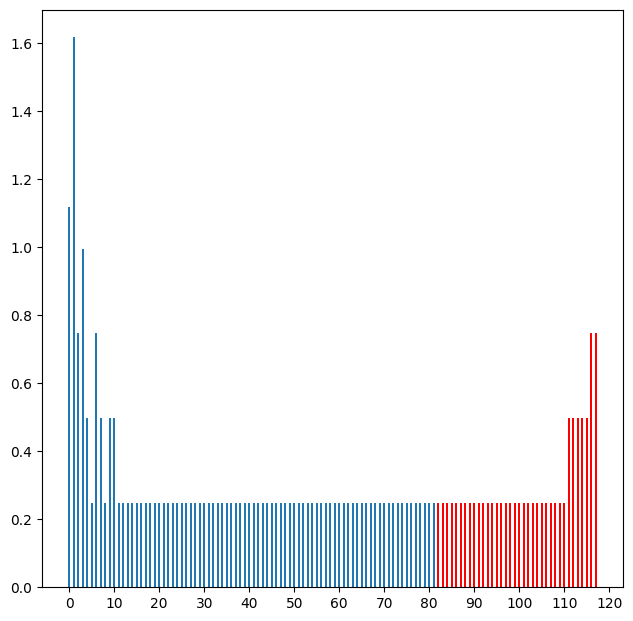

In [74]:
fig, axs = plt.subplots(figsize=(7.5,7.5))

axs.bar(x[:len(missing_training_data)], missing_training_data, width, label='Train')
axs.bar(x[len(missing_training_data):118], missing_test_data[:len(missing_test_data)-1], width, label='Test', color='red')
axs.set_xticklabels(labels=np.arange(0, len(x), 10), rotation=0, fontsize=10)
axs.set_xticks(np.arange(0, len(x), 10))

# Shade by "specific" time period

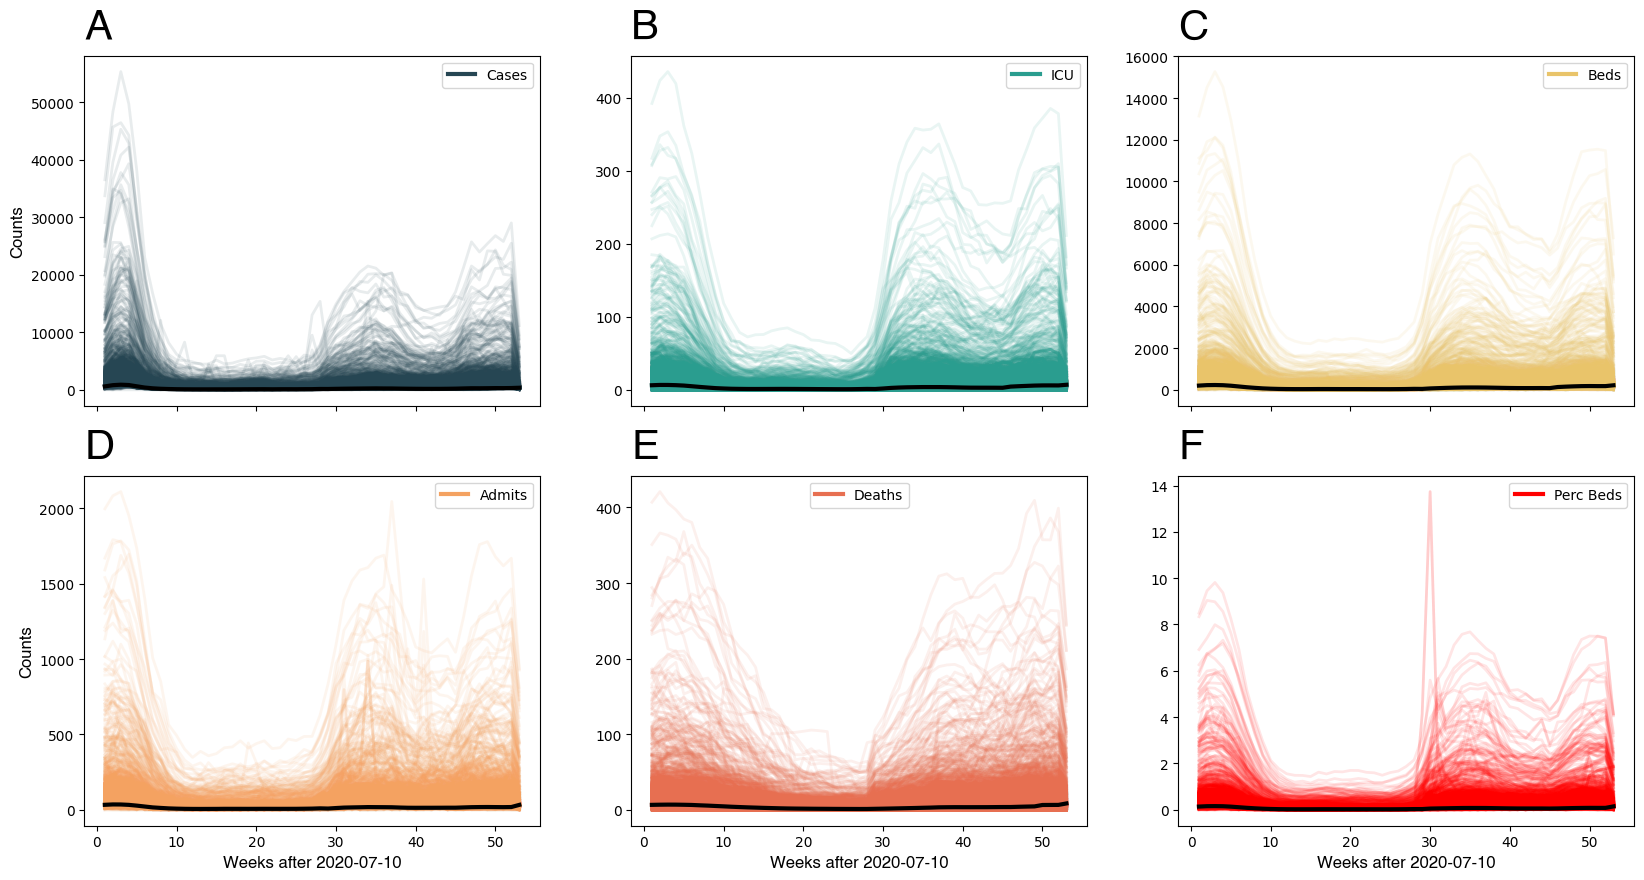

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10), facecolor='w', edgecolor='k', sharex='all')
axs = axs.ravel()

axs[0].set_ylabel("Counts", fontsize=12, **hfont)
axs[3].set_ylabel("Counts", fontsize=12, **hfont)
axs[1].set_ylabel("", fontsize=12)
axs[2].set_ylabel("", fontsize=12)
axs[4].set_ylabel("", fontsize=12)
axs[5].set_ylabel("", fontsize=12)
axs[3].set_xlabel("Weeks after 2020-07-10", fontsize=12, **hfont)
axs[4].set_xlabel("Weeks after 2020-07-10", fontsize=12, **hfont)
axs[5].set_xlabel("Weeks after 2020-07-10", fontsize=12, **hfont)
weekly_county_groups = data_by_county.groupby(['week'])  # Group by county and week

columns_to_plot = ['cases_weekly', 'icu_weekly', 'beds_weekly', 'admits_weekly', 'deaths_weekly', 'perc_covid']
labels = ['Cases', 'ICU', 'Beds', 'Admits', 'Deaths', 'Perc Beds']
colours =['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', 'red']
weekly_county_groups = data_by_county.groupby(['week'])  # Group by county and week
i = 0
width = 0.4
high_icu = []
high_cases = []
high_beds = []
high_admits = []
high_deaths = []
percentiles_dict = {}
average_data_dict = {}
x = np.arange(len(weekly_county_groups))
for column in columns_to_plot:
    #if column == 'beds_over_15_100k':
       # axs[i].bar(x[:len(missing_data_train_county)], missing_data_train_county, width, label='Train')
       # axs[i].bar(x[len(missing_data_train_county):], missing_data_test_county, width, label='Test', color='red')
       # axs[i].set_xticklabels(labels=np.arange(0, len(x), 10), rotation=0, fontsize=10)
       # axs[i].set_xticks(np.arange(0, len(x), 10))
    #else:

        for county in data_by_county['county'].unique():
            county_data = data_by_county[data_by_county['county'] == county]
            county_data_weekly = county_data.groupby(['week'])
            axs[i].plot(county_data_weekly['week'].first(), county_data_weekly[column].sum(), color=colours[i], linewidth=2, alpha=0.1)
            sum_value = county_data_weekly[column].sum()
            if column == 'cases_weekly':
                if sum_value.gt(10000).any():
                    high_cases.append(county)

            elif column == 'icu_weekly':
                if sum_value.gt(50).any():
                    high_icu.append(county) 

            elif column == 'beds_weekly':
                if sum_value.gt(2000).any():
                    high_beds.append(county)   

            elif column == 'admits_weekly':
                if sum_value.gt(200).any():
                    high_admits.append(county)   
     
            elif column == 'deaths_weekly':
                if sum_value.gt(150).any():
                    high_deaths.append(county)  
       
        # Calculate and plot the average
        average_data = data_by_county.groupby('week')[column].mean()
        average_data_dict[column] = average_data
        axs[i].plot(average_data.index, average_data,  color=colours[i],  label=labels[i], linewidth=3)
        axs[i].plot(average_data.index, average_data, color='black', linewidth=3)
        axs[i].text(axs[i].get_xlim()[0] , axs[i].get_ylim()[1]* 1.05, subplot_labels[i], fontsize = 30, **hfont)

        axs[i].legend()

        i += 1

#plt.savefig('Graphs/Time_trends_July_December_by_county.png', dpi = 300)

In [11]:
## DELTA POLYGON 

start_date = pd.to_datetime('2021-05-30')
end_date = pd.to_datetime('2021-10-26')
data_by_county['date'] = pd.to_datetime(data_by_county['date'])
for i, week in enumerate(data_by_county['date'].unique()):
    data_by_county.loc[data_by_county['date'] == week, 'week'] = i
# Find the indices of rows that match the exact start and end dates
matching_indices_start = data_by_county.loc[data_by_county['date'] <= start_date].index.max()
matching_indices_end = data_by_county.loc[data_by_county['date'] <= end_date].index.max()
first_week_delta = data_by_county.loc[matching_indices_start, 'week']
last_week_delta = data_by_county.loc[matching_indices_end, 'week']


In [15]:
## OMRICON POLYGON 

start_date = pd.to_datetime('2021-10-26')
end_date = pd.to_datetime('2022-09-27')
data_by_county['date'] = pd.to_datetime(data_by_county['date'])
for i, week in enumerate(data_by_county['date'].unique()):
    data_by_county.loc[data_by_county['date'] == week, 'week'] = i
# Find the indices of rows that match the exact start and end dates
matching_indices_start = data_by_county.loc[data_by_county['date'] <= start_date].index.max()
matching_indices_end = data_by_county.loc[data_by_county['date'] <= end_date].index.max()
first_week_omricon = data_by_county.loc[matching_indices_start, 'week']
last_week_omricon = data_by_county.loc[matching_indices_end, 'week']

In [13]:
## CDC POLYGON 
start_date = pd.to_datetime('2021-03-01')
end_date = pd.to_datetime('2022-01-24')
data_by_county['date'] = pd.to_datetime(data_by_county['date'])
for i, week in enumerate(data_by_county['date'].unique()):
    data_by_county.loc[data_by_county['date'] == week, 'week'] = i
# Find the indices of rows that match the exact start and end dates
matching_indices_start = data_by_county.loc[data_by_county['date'] <= start_date].index.max()
matching_indices_end = data_by_county.loc[data_by_county['date'] <= end_date].index.max()
first_week_CDC = data_by_county.loc[matching_indices_start, 'week']
last_week_CDC = data_by_county.loc[matching_indices_end, 'week']

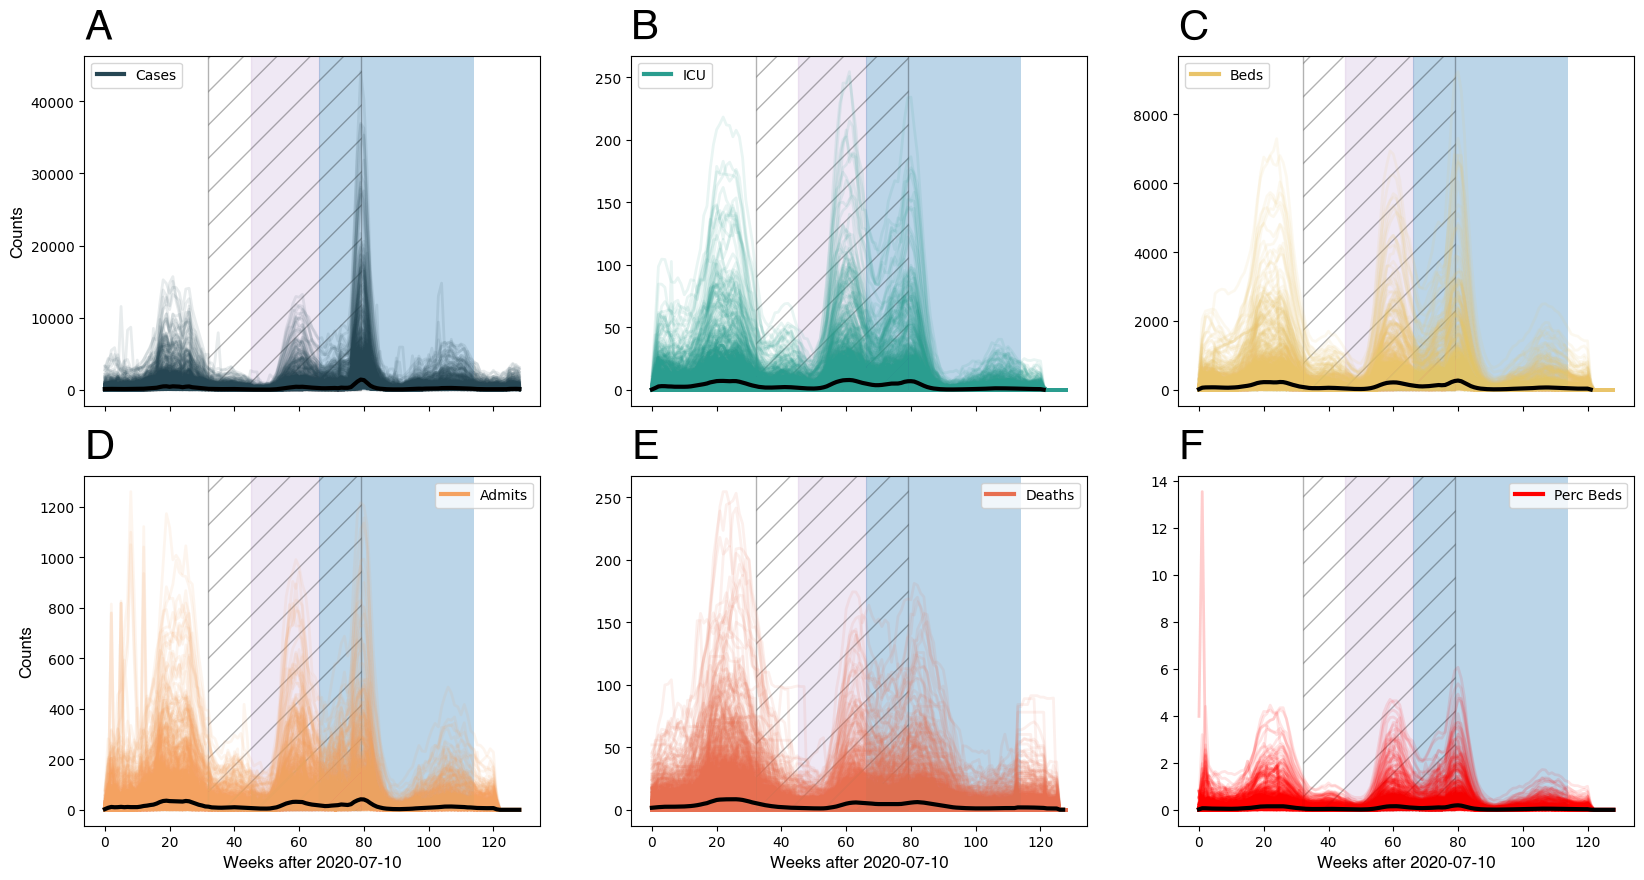

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10), facecolor='w', edgecolor='k', sharex='all')
axs = axs.ravel()

axs[0].set_ylabel("Counts", fontsize=12, **hfont)
axs[3].set_ylabel("Counts", fontsize=12, **hfont)
axs[1].set_ylabel("", fontsize=12)
axs[2].set_ylabel("", fontsize=12)
axs[4].set_ylabel("", fontsize=12)
axs[5].set_ylabel("", fontsize=12)
axs[3].set_xlabel("Weeks after 2020-07-10", fontsize=12, **hfont)
axs[4].set_xlabel("Weeks after 2020-07-10", fontsize=12, **hfont)
axs[5].set_xlabel("Weeks after 2020-07-10", fontsize=12, **hfont)
weekly_county_groups = data_by_county.groupby(['week'])  # Group by county and week

columns_to_plot = ['cases_weekly', 'icu_weekly', 'beds_weekly', 'admits_weekly', 'deaths_weekly', 'perc_covid']

labels = ['Cases', 'ICU', 'Beds', 'Admits', 'Deaths', 'Perc Beds']
colours =['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', 'red']
weekly_county_groups = data_by_county.groupby(['week'])  # Group by county and week
i = 0
width = 0.4
high_icu = []
high_cases = []
high_beds = []
high_admits = []
high_deaths = []
percentiles_dict = {}
average_data_dict = {}
x = np.arange(len(weekly_county_groups))
for column in columns_to_plot:

        for county in data_by_county['county'].unique():
            county_data = data_by_county[data_by_county['county'] == county]
            county_data_weekly = county_data.groupby(['week'])
            axs[i].plot(county_data_weekly['week'].first(), county_data_weekly[column].sum(), color=colours[i], linewidth=2, alpha=0.1)
            sum_value = county_data_weekly[column].sum()
            if column == 'cases_weekly':
                if sum_value.gt(10000).any():
                    high_cases.append(county)

            elif column == 'icu_weekly':
                if sum_value.gt(50).any():
                    high_icu.append(county) 

            elif column == 'beds_weekly':
                if sum_value.gt(2000).any():
                    high_beds.append(county)   

            elif column == 'admits_weekly':
                if sum_value.gt(200).any():
                    high_admits.append(county)   
     
            elif column == 'deaths_weekly':
                if sum_value.gt(150).any():
                    high_deaths.append(county)  
       
        # Calculate and plot the average
        average_data = data_by_county.groupby('week')[column].mean()
        average_data_dict[column] = average_data
        axs[i].plot(average_data.index, average_data,  color=colours[i],  label=labels[i], linewidth=3)
        axs[i].plot(average_data.index, average_data, color='black', linewidth=3)
        axs[i].text(axs[i].get_xlim()[0] , axs[i].get_ylim()[1]* 1.05, subplot_labels[i], fontsize = 30, **hfont)

        axs[i].legend()

        i += 1

#add delta polygon
for ax in axs:
    polygon_delta = Polygon([(first_week_delta, 0), (first_week_delta, 100000), (last_week_delta, 100000), (last_week_delta, 0)],
                      alpha=0.3, color = '#cdb4db')
    ax.add_patch(polygon_delta)
    polygon_omricon = Polygon([(first_week_omricon, 0), (first_week_omricon, 100000), (last_week_omricon, 100000), (last_week_omricon, 0)],
                      alpha=0.3)
    ax.add_patch(polygon_omricon)
    polygon_CDC = Polygon([(first_week_CDC, 0), (first_week_CDC, 100000), (last_week_CDC, 100000), (last_week_CDC, 0)],
                      alpha=0.3, fill = False,  hatch='/')
    ax.add_patch(polygon_CDC)
plt.savefig('Graphs/Time_trends_July_December_by_county_with_periods.png', dpi = 300)